## Implementing Simple chatbot using Langgraph

In [13]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END


In [14]:
## Reducers 
from typing import Annotated
from langgraph.graph.message import add_messages

##add_messages - > merges two lists of messages, updating existing messages by ID

In [15]:
class State(TypedDict):
    messages : Annotated[list, add_messages]  ##add_messages append the message in the list not overrride

In [16]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [17]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

In [18]:
from langchain_groq import ChatGroq
llm_groq = ChatGroq(model="qwen/qwen3-32b")
llm_groq.invoke("Hello how are you?")

AIMessage(content="<think>\nOkay, the user greeted me with a friendly Hello how are you? I should respond in a warm and approachable way. Since I'm an AI and don't experience emotions, I need to be honest while still being engaging. I'll acknowledge their greeting, express that I'm functioning well, and show genuine interest in how they're doing. Keeping the tone conversational and inviting is key here. I want to make sure they feel comfortable to share more if they'd like. Let's keep it light and friendly.\n</think>\n\nHi there! (•̀ᴗ•́)و Thank you for checking in! I'm functioning at optimal levels and ready to chat or help with whatever you'd like. How have you been lately? I'd love to hear how your day is going! 🌟", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 164, 'prompt_tokens': 13, 'total_tokens': 177, 'completion_time': 0.398732869, 'prompt_time': 0.000305385, 'queue_time': 0.050304985, 'total_time': 0.399038254}, 'model_name': 'qwen/qwen3-32b', 

In [19]:
def superbot(state: State):
    return {"messages": [llm_groq.invoke(state['messages'])]}

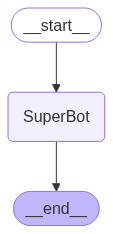

In [20]:
graph = StateGraph(State)

#Node
graph.add_node("SuperBot",superbot)

#Edge
graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)

graph_builder = graph.compile()

## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [21]:
## Invocation

graph_builder.invoke({'messages':"Hi, My name is Krish and I like to Play Volleyball and Cricket."})


{'messages': [HumanMessage(content='Hi, My name is Krish and I like to Play Volleyball and Cricket.', additional_kwargs={}, response_metadata={}, id='73d35953-9bb7-4284-82ab-817cdd98e2ec'),
  AIMessage(content="<think>\nOkay, the user introduced themselves as Krish and mentioned they like playing volleyball and cricket. I need to respond appropriately. Let me start by acknowledging their introduction.\n\nI should ask more about their interests to keep the conversation going. Maybe ask which sport they prefer and why. Also, find out if they play competitively or for fun. Adding a friendly question about their favorite part of the sports could help. Need to keep it open-ended and engaging. Make sure the tone is friendly and supportive. Let me check if there's anything else I should include. Oh, maybe ask if they have any memorable experiences in either sport. Yeah, that could work. Alright, time to put it all together in a natural way.\n</think>\n\nHi Krish! Nice to meet you! 🌟 Volleybal

# Streaming the responses

In [25]:
for event in graph_builder.stream({"messages": "Hello, My name is Fake"}, stream_mode = "values"):
    print(event)

{'messages': [HumanMessage(content='Hello, My name is Fake', additional_kwargs={}, response_metadata={}, id='1aaf4d8a-3b29-4cfa-9e7e-dd899413391c')]}
{'messages': [HumanMessage(content='Hello, My name is Fake', additional_kwargs={}, response_metadata={}, id='1aaf4d8a-3b29-4cfa-9e7e-dd899413391c'), AIMessage(content="<think>\nOkay, the user said, Hello, My name is Fake. First, I need to understand how to respond. Since the user provided their name as Fake, I should acknowledge it while keeping a friendly and professional tone. I can start by greeting them and using their provided name. Next, I should ask how I can assist them today to show I'm ready to help and encourage them to state their needs. At the same time, I should maintain a natural and conversational style, avoiding overly formal language. Also, I need to ensure the response is concise and not too long. Let me check for any possible issues. Using 'Fake' as the name might be a username or a test, so there's no need to question